In [84]:
import pandas as pd
df= pd.read_csv("level_coding_siswa_150.csv")

df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [3]:
df.info

<bound method DataFrame.info of      hours_coding_daily preferred_language  typing_speed import_usage  \
0                   4.0             Python            44          Yes   
1                   5.0                C++            59          Yes   
2                   5.0             Python            55          Yes   
3                   5.0             Python            59          Yes   
4                   5.0             Python            55          Yes   
..                  ...                ...           ...          ...   
169                 2.5                C++            40           No   
170                 4.0             Python            48          Yes   
171                 5.0                C++            34          Yes   
172                 3.5               Java            45          Yes   
173                 3.0                C++            38          Yes   

    oop_usage         level  
0         Yes      Advanced  
1         Yes      Advanced  
2

In [4]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [8]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [7]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


In [16]:
df.columns

Index(['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage', 'level'],
      dtype='object')

In [17]:
df.shape

(174, 6)

In [94]:
df.dtypes

hours_coding_daily    float64
preferred_language     object
typing_speed            int64
import_usage           object
oop_usage              object
level                  object
dtype: object

In [11]:
df["hours_coding_daily"].value_counts

<bound method IndexOpsMixin.value_counts of 0      4.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
169    2.5
170    4.0
171    5.0
172    3.5
173    3.0
Name: hours_coding_daily, Length: 174, dtype: float64>

In [96]:
df["level"].value_counts

<bound method IndexOpsMixin.value_counts of 0          Advanced
1          Advanced
2          Advanced
3          Advanced
4          Advanced
           ...     
169    Intermediate
170    Intermediate
171    Intermediate
172    Intermediate
173    Intermediate
Name: level, Length: 174, dtype: object>

In [12]:
df["typing_speed"].value_counts

<bound method IndexOpsMixin.value_counts of 0      44
1      59
2      55
3      59
4      55
       ..
169    40
170    48
171    34
172    45
173    38
Name: typing_speed, Length: 174, dtype: int64>

<function matplotlib.pyplot.show(close=None, block=None)>

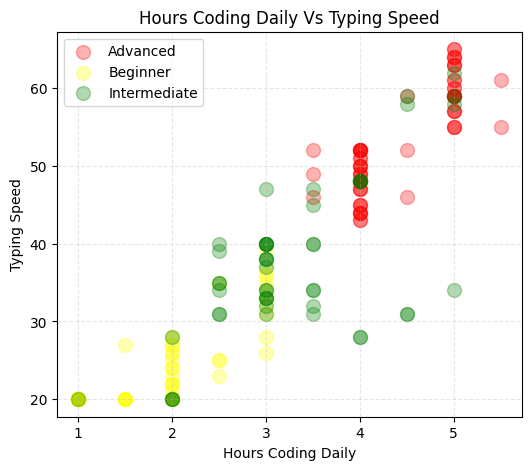

In [36]:
import matplotlib.pyplot as plt

advanced = df[df["level"]=="Advanced"]
beginner = df[df["level"]=="Beginner"]
intermediate = df[df["level"]=="Intermediate"]

plt.figure(figsize=(6,5))
plt.scatter(advanced["hours_coding_daily"], advanced["typing_speed"], s=100, alpha=0.3,  color="red", label="Advanced")
plt.scatter(beginner["hours_coding_daily"], beginner["typing_speed"], s=100, alpha=0.3, color="yellow", label="Beginner")
plt.scatter(intermediate["hours_coding_daily"], intermediate["typing_speed"],alpha=0.3, s=100, color="green", label="Intermediate")

plt.title("Hours Coding Daily Vs Typing Speed")
plt.xlabel("Hours Coding Daily")
plt.ylabel("Typing Speed")
plt.grid(True, linestyle='--', alpha=0.3,)
plt.legend()
plt.show


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hours_coding_daily", "preferred_language", "typing_speed",
        "import_usage", "oop_usage"]]
y = df["level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["hours_coding_daily", "typing_speed"]
categorical_columns = ["preferred_language", "import_usage", "oop_usage"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)


model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", RandomForestClassifier(random_state=42))
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", scores)
print("Akurasi rata-rata:", scores.mean())


Accuracy: 0.8857142857142857

Classification Report:
               precision    recall  f1-score   support

    Advanced       0.94      0.94      0.94        17
    Beginner       0.88      0.88      0.88         8
Intermediate       0.80      0.80      0.80        10

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35


Confusion Matrix:
 [[16  0  1]
 [ 0  7  1]
 [ 1  1  8]]
Akurasi per fold: [0.78571429 0.89285714 0.82142857 0.89285714 0.88888889]
Akurasi rata-rata: 0.8563492063492063


In [111]:
import joblib

joblib.dump(model, "level_coding.joblib")

['level_coding.joblib']